<a href="https://colab.research.google.com/github/Alinka7/-NUMERICAL-SOLUTION-OF-DIFFERENTIAL-EQUATIONS-IN-PARTIAL-DERIVATIVES-/blob/main/part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

14536120/14536120 [==============================] - 0s 0us/step


In [3]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

In [66]:
image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

1/1 [==============================] - 0s 98ms/step


In [67]:
image

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[ 0.21712625,  0.25683212, -0.2598346 ],
         [ 0.21268594,  0.28474486, -0.20937276],
         [ 0.28137255,  0.3803922 , -0.10343134],
         ...,
         [ 0.01257002,  0.07531512, -0.37174374],
         [ 0.0419184 ,  0.10466349, -0.35808164],
         [ 0.01515567,  0.07790077, -0.39219737]],

        [[ 0.16701686,  0.22731423, -0.29153317],
         [ 0.20507705,  0.27767098, -0.22268909],
         [ 0.27753627,  0.37744772, -0.12228638],
         ...,
         [ 0.09616482,  0.16461718, -0.29786307],
         [ 0.0660944 ,  0.13454676, -0.33390558],
         [ 0.12299645,  0.19144893, -0.2873435 ]],

        [[ 0.1211791 ,  0.19268858, -0.30375636],
         [ 0.15968025,  0.24595475, -0.27169228],
         [ 0.21157646,  0.31304705, -0.20610559],
         ...,
         [ 0.12801123,  0.2064426 , -0.26921284],
         [ 0.1727252 ,  0.25115657, -0.22727484],
         [ 0.13919818,  0.21762955, -0.276429 

In [ ]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [6]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [ ]:
# Get the input label of the image.
labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

In [8]:
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

In [ ]:
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x, descriptions[i])

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
t = plt.imread('/content/drive/MyDrive/Colab Notebooks/t/images/0030025.png')
t = plt.imread('/content/drive/MyDrive/Colab Notebooks/CamVid/train/Seq05VD_f05100.png')

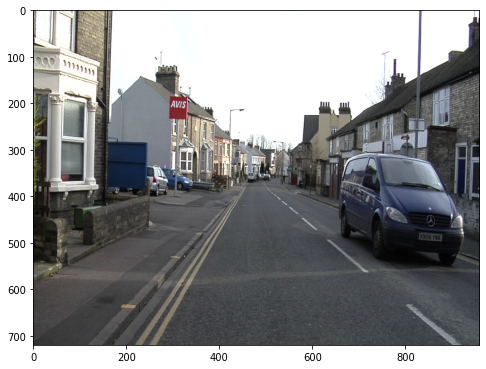

In [239]:
plt.imshow(t)

In [240]:
t = tf.convert_to_tensor(t)

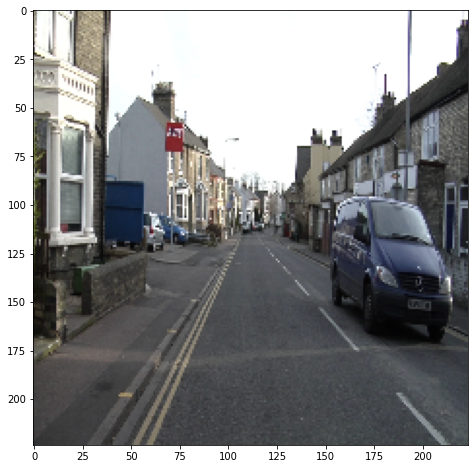

In [241]:
image = tf.cast(t, tf.float32)
image = tf.image.resize(image, (224, 224))
# image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
# image = image[None, ...]
plt.imshow(image)

In [242]:
t = tf.keras.applications.mobilenet_v2.preprocess_input(image*255)

In [243]:
t = tf.expand_dims(t, axis=0)

In [244]:
image_probs = pretrained_model.predict(t)

1/1 [==============================] - 0s 64ms/step


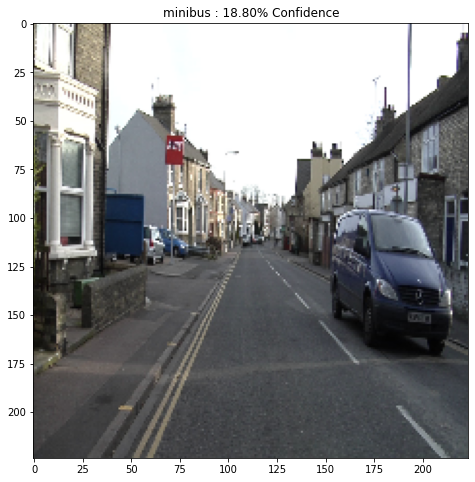

In [245]:
plt.figure()
plt.imshow(t[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [246]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

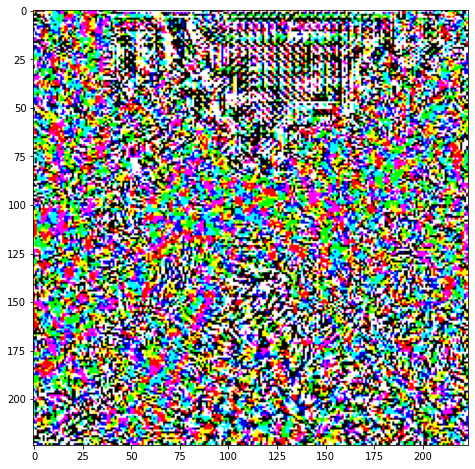

In [247]:
# Get the input label of the image.
labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(t, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

In [248]:
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

1/1 [==============================] - 0s 64ms/step


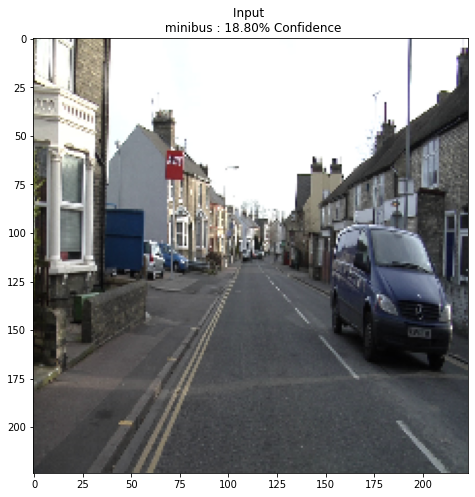

1/1 [==============================] - 0s 75ms/step


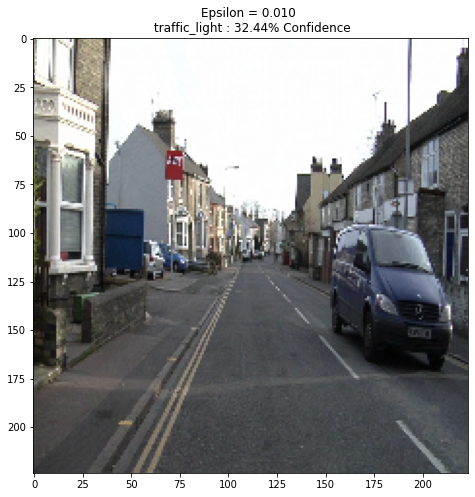

1/1 [==============================] - 0s 60ms/step


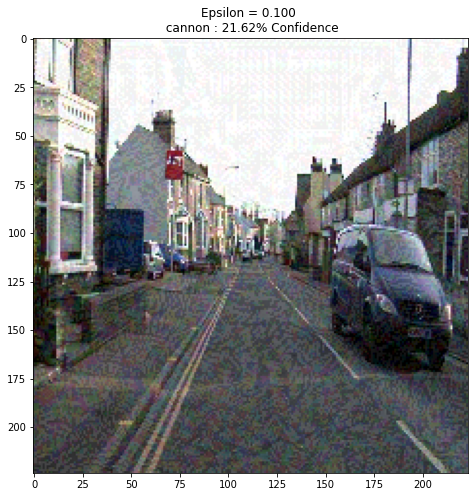

1/1 [==============================] - 0s 72ms/step


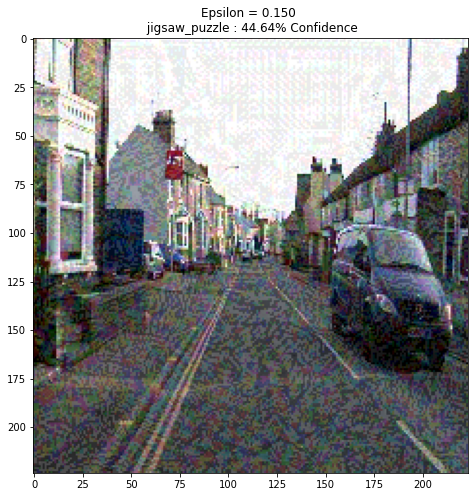

1/1 [==============================] - 0s 85ms/step


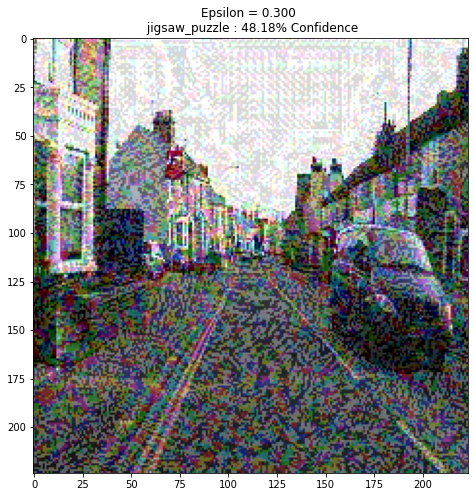

In [249]:
epsilons = [0, 0.01, 0.1, 0.15, 0.3]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = t + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x, descriptions[i])

In [237]:

# Python 3 code to rename multiple
# files in a directory or folder
 
# importing os module
import os
 
# Function to rename multiple files

   
folder = "/content/drive/MyDrive/Colab Notebooks/t/segmentations"
for count, filename in enumerate(os.listdir(folder)):
    dst = f"Hostel {str(count)}.jpg"
    src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
    dst =f"{folder}/{dst}"
      
    # rename() function will
    # rename all the files
    os.rename(src, dst)
 
